https://www.kaggle.com/c/dog-breed-identification/data

In [11]:
%matplotlib inline
import os
os.chdir("/home/ubuntu/")

import utils; reload(utils)
from utils import *

#adding utility libraries
import os
import sys
import random
import time
import pip
import shutil
print ("utility libraries loaded.")

import numpy as np
import pandas as pd
print ("ML/Sci libraries loaded.")


utility libraries loaded.
ML/Sci libraries loaded.


In [59]:
#set home directory for this project
path = "/home/ubuntu/kaggleDogId/"
trainDir = "train/"
testDir = "test/"
verifyDir = "verify/"

In [15]:
os.chdir(path)
print "current dir:", os.getcwd()

trainFileNames = [name for name in os.listdir(trainDir) if os.path.isfile(os.path.join(trainDir, name))]
print "\ntrainFileNames:\n", trainFileNames[0:10]
print ("# of training files : ", len(trainFileNames))
testDir = "test/"
testFileNames =  [name for name in os.listdir(testDir) if os.path.isfile(os.path.join(testDir, name))]
print "\ntestFileNames:\n", testFileNames[0:10]
print ("# of testing files : ", len(testFileNames))

current dir: /home/ubuntu/kaggleDogId

trainFileNames:
['4bc4ddb7cde7f2b75154dba3763b93c0.jpg', 'aed87189e6b60b02c3f16566afe8cbd6.jpg', 'eac45b011f55db4480995fb0643c54d2.jpg', '8fc88385d3033eccfcc88736e5f0cfa8.jpg', '256b9947f9be5c60b21fa969fa51fe2e.jpg', '2ac2f5944e38c9873fddd80f44929a91.jpg', '6c92c846d375a7636bd21859c5304a21.jpg', 'fc2049d582b3444ed99af4a5c13b49e5.jpg', 'c3bf9ce1db1a3fc772bdff96055032e4.jpg', '36910e7d2411ea0595b590564cd1a473.jpg']
('# of training files : ', 10222)

testFileNames:
['e8e6e731b4afb84faf9c022a67935867.jpg', '9bf93ac268122f8985cd9dcafa2e3a85.jpg', '1217ee8c4a27f7d7d3c2175baac8afc2.jpg', 'b171e4ea1717aefa495e4b5e67dba0f1.jpg', '6aa7ea7a603a49723643c2fcf923dc1f.jpg', 'cd0a8261be06236f76518a976d38c071.jpg', 'b41241ea71ff8c4718a6db0ee93a450c.jpg', 'fd00217f290ccf234938de263f2d5738.jpg', 'd0fb1d5a18ffd793a5c7ee1e8c7b69f6.jpg', 'bb6129318013b55d841e729499ba0210.jpg']
('# of testing files : ', 10357)


In [50]:
os.chdir(path)
print "current dir:", os.getcwd()

labels = pd.read_csv('labels.csv')
print (type(labels), labels.shape)
submitSample = pd.read_csv('sample_submission.csv')
print (type(submitSample), submitSample.shape)
#nb: submitSample reports 121 columns, 1st column = filename (less .jpg), 2nd t0 121st column represents prob for each breed.
#header row of sample_submission.csv is id followed by breed names. appears to be alphabetical order. check before trusting. 

current dir: /home/ubuntu/kaggleDogId
(<class 'pandas.core.frame.DataFrame'>, (10222, 2))
(<class 'pandas.core.frame.DataFrame'>, (10357, 121))


In [21]:
#explore the labels data
print ("column names:", list(labels))
breeds = list(labels.breed.unique())
print "# of unique breeds:", len(breeds)
print breeds

('column names:', ['id', 'breed'])
# of unique breeds: 120
['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'wel

In [29]:
#reset dir just for safety during non-sequential notebook execution
os.chdir(path)
print "current dir:", os.getcwd()

countExistingDir = 0
newDirCreated = 0
print "# of unique breeds:", len(breeds)
print "current dir:", os.getcwd()
for breed in breeds:
    newDir = trainDir+breed
    #print(newDir)
    try:
        os.stat(newDir)
        countExistingDir += 1
    except:
        #print("directory",newDir,"does not exist, creating.")
        os.mkdir(newDir)
        newDirCreated += 1
print "Existing Directories:", countExistingDir
print "newDirCreated:", newDirCreated

# of unique breeds: 120
current dir: /home/ubuntu/kaggleDogId
Existing Directories: 120
newDirCreated: 0


In [60]:
#duplicate process to create category directories under verify
#todo: clean up and rewrite as method.
#reset dir just for safety during non-sequential notebook execution
os.chdir(path)
print "current dir:", os.getcwd()

try:
    os.stat(verifyDir)
    countExistingDir += 1
except:
    print("directory", verifyDir,"does not exist, creating.")
    os.mkdir(verifyDir)
    print("directory", verifyDir," created.")

countExistingDir = 0
newDirCreated = 0
print "# of unique breeds:", len(breeds)
print "current dir:", os.getcwd()
for breed in breeds:
    newDir = verifyDir+breed
    print(newDir)
    try:
        os.stat(newDir)
        countExistingDir += 1
    except:
        print("directory",newDir,"does not exist, creating.")
        os.mkdir(newDir)
        newDirCreated += 1
print "Existing Directories:", countExistingDir
print "newDirCreated:", newDirCreated

current dir: /home/ubuntu/kaggleDogId
('directory', 'verify/', 'does not exist, creating.')
('directory', 'verify/', ' created.')
# of unique breeds: 120
current dir: /home/ubuntu/kaggleDogId
verify/boston_bull
('directory', 'verify/boston_bull', 'does not exist, creating.')
verify/dingo
('directory', 'verify/dingo', 'does not exist, creating.')
verify/pekinese
('directory', 'verify/pekinese', 'does not exist, creating.')
verify/bluetick
('directory', 'verify/bluetick', 'does not exist, creating.')
verify/golden_retriever
('directory', 'verify/golden_retriever', 'does not exist, creating.')
verify/bedlington_terrier
('directory', 'verify/bedlington_terrier', 'does not exist, creating.')
verify/borzoi
('directory', 'verify/borzoi', 'does not exist, creating.')
verify/basenji
('directory', 'verify/basenji', 'does not exist, creating.')
verify/scottish_deerhound
('directory', 'verify/scottish_deerhound', 'does not exist, creating.')
verify/shetland_sheepdog
('directory', 'verify/shetland_

In [49]:
print "current dir:", os.getcwd()

#use data from labels.csv to move files into categories - setup for vgg16 algo to process files.
count =0
success = 0
fail = 0
for index, row in labels.iterrows():
    #print index, row.id, row.breed
    currentFileName = path+trainDir+row.id+".jpg"
    newFileName     = path+trainDir+row.breed+"/"+row.id+".jpg"
    #print "moving", currentFileName, " to ", newFileName
    try:
        shutil.move(currentFileName, newFileName)
        success += 1
    except:
        fail += 1
        #print "file move failed."
    count +=1
    #if count > 5:
    #    break
print "success:", success
print "fail:", fail
print "success+fail=", success+fail
print "Total # of files:", labels.shape[0]

current dir: /home/ubuntu/kaggleDogId
success: 0
fail: 10222
success+fail= 10222
Total # of files: 10222


In [58]:
os.chdir(path+trainDir)
print "current dir:", os.getcwd()
breedCount = []

#count the files in each train subdirectory.
totalCount=0
for breed in breeds:
    numFiles = len([name for name in os.listdir(breed) if os.path.isfile(os.path.join(breed, name))])
    breedCount.append(numFiles)
    totalCount += numFiles
    print breed, " #:", numFiles
    #print ("                              {0:30}  {3}".format(breed, numFiles))#fix this later for nice formatting.
print "-----------------------totalCount:", totalCount
print "# of labels in labels.csv : ", labels.shape[0]


current dir: /home/ubuntu/kaggleDogId/train
boston_bull  #: 87
dingo  #: 80
pekinese  #: 75
bluetick  #: 85
golden_retriever  #: 67
bedlington_terrier  #: 89
borzoi  #: 75
basenji  #: 110
scottish_deerhound  #: 126
shetland_sheepdog  #: 76
walker_hound  #: 69
maltese_dog  #: 117
norfolk_terrier  #: 83
african_hunting_dog  #: 86
wire-haired_fox_terrier  #: 82
redbone  #: 72
lakeland_terrier  #: 99
boxer  #: 75
doberman  #: 74
otterhound  #: 69
standard_schnauzer  #: 72
irish_water_spaniel  #: 78
black-and-tan_coonhound  #: 77
cairn  #: 106
affenpinscher  #: 80
labrador_retriever  #: 84
ibizan_hound  #: 91
english_setter  #: 83
weimaraner  #: 85
giant_schnauzer  #: 69
groenendael  #: 82
dhole  #: 76
toy_poodle  #: 80
border_terrier  #: 91
tibetan_terrier  #: 107
norwegian_elkhound  #: 95
shih-tzu  #: 112
irish_terrier  #: 82
kuvasz  #: 71
german_shepherd  #: 69
greater_swiss_mountain_dog  #: 82
basset  #: 82
australian_terrier  #: 102
schipperke  #: 86
rhodesian_ridgeback  #: 88
irish_se

In [65]:
#move a % of files from train to verify to enable testing of model accuracy
#be careful to only run this _____ONCE!!!_____

#loop through train directories

#make list of files in directory

# select a % of files and move to directories in verifyDirList
os.chdir(path)
print "current dir:", os.getcwd()

verifyFraction = 0.2
#training/validation/test typically 80/10/10%
#we are splitting from train to verify. to achieve 80/10/10 want 1/9 split off. ie  0.111

for breed in breeds:
    sourceDir = path+trainDir+breed+"/"
    destDir = path+verifyDir+breed+"/"
    print ("moving files from ", sourceDir, " to ", destDir)
    fileList = [name for name in os.listdir(sourceDir) if os.path.isfile(os.path.join(sourceDir, name))]    
    intToMove = random.sample(range(0, len(fileList)), int(verifyFraction * len(fileList)) )
    print ("# of files in dir: ", len(fileList), "# of files to move:", len(intToMove))
    print ("index of files to move:", intToMove)
    for int_ in intToMove:
        print("int_:", int_)
        src = sourceDir +fileList[int_]
        dst = destDir   +fileList[int_]
        print ("moving from ", src, " to ", dst)
        shutil.move(src, dst)
    #break#use this for testing only.
print ("completed")        


current dir: /home/ubuntu/kaggleDogId
('moving files from ', '/home/ubuntu/kaggleDogId/train/boston_bull/', ' to ', '/home/ubuntu/kaggleDogId/verify/boston_bull/')
('# of files in dir: ', 87, '# of files to move:', 17)
('index of files to move:', [50, 78, 40, 82, 62, 1, 74, 2, 80, 35, 72, 34, 18, 43, 20, 63, 51])
('int_:', 50)
('moving from ', '/home/ubuntu/kaggleDogId/train/boston_bull/faa2c24c801b37aca93ac744da51c2c3.jpg', ' to ', '/home/ubuntu/kaggleDogId/verify/boston_bull/faa2c24c801b37aca93ac744da51c2c3.jpg')
('int_:', 78)
('moving from ', '/home/ubuntu/kaggleDogId/train/boston_bull/aa7d9f08fc9ac1d45117848137adce9c.jpg', ' to ', '/home/ubuntu/kaggleDogId/verify/boston_bull/aa7d9f08fc9ac1d45117848137adce9c.jpg')
('int_:', 40)
('moving from ', '/home/ubuntu/kaggleDogId/train/boston_bull/65c0f97251e14cfddda723b209114f80.jpg', ' to ', '/home/ubuntu/kaggleDogId/verify/boston_bull/65c0f97251e14cfddda723b209114f80.jpg')
('int_:', 82)
('moving from ', '/home/ubuntu/kaggleDogId/train/bost

In [67]:
#count files in both train and verify directory. check total still valid.
os.chdir(path)
#trainDir
#verifyDir
print "current dir:", os.getcwd()

#count the files in each train subdirectory.
totalCount=0
for breed in breeds:
    numTrainFiles = len([name for name in os.listdir(trainDir+breed) if os.path.isfile(os.path.join(trainDir+breed, name))])
    numVerifyFiles = len([name for name in os.listdir(verifyDir+breed) if os.path.isfile(os.path.join(verifyDir+breed, name))])
    totalCount += (numTrainFiles+numVerifyFiles)
    print breed, "train#", numTrainFiles, ", verify#", numVerifyFiles, ", subtotal:", numTrainFiles+numVerifyFiles
    #print ("                              {0:30}  {3}".format(breed, numFiles))#fix this later for nice formatting.
print "-----------------------totalCount:", totalCount
print "# of labels in labels.csv : ", labels.shape[0]

current dir: /home/ubuntu/kaggleDogId
boston_bull train# 70 , verify# 17 , subtotal: 87
dingo train# 64 , verify# 16 , subtotal: 80
pekinese train# 60 , verify# 15 , subtotal: 75
bluetick train# 68 , verify# 17 , subtotal: 85
golden_retriever train# 54 , verify# 13 , subtotal: 67
bedlington_terrier train# 72 , verify# 17 , subtotal: 89
borzoi train# 60 , verify# 15 , subtotal: 75
basenji train# 88 , verify# 22 , subtotal: 110
scottish_deerhound train# 101 , verify# 25 , subtotal: 126
shetland_sheepdog train# 61 , verify# 15 , subtotal: 76
walker_hound train# 56 , verify# 13 , subtotal: 69
maltese_dog train# 94 , verify# 23 , subtotal: 117
norfolk_terrier train# 67 , verify# 16 , subtotal: 83
african_hunting_dog train# 69 , verify# 17 , subtotal: 86
wire-haired_fox_terrier train# 66 , verify# 16 , subtotal: 82
redbone train# 58 , verify# 14 , subtotal: 72
lakeland_terrier train# 80 , verify# 19 , subtotal: 99
boxer train# 60 , verify# 15 , subtotal: 75
doberman train# 60 , verify# 14 , 

Steps above were preparing data by creating directory for each category, then moving files into their categories.  
Should be zero files left in train/ directory and 120 sub-directories to train/ 

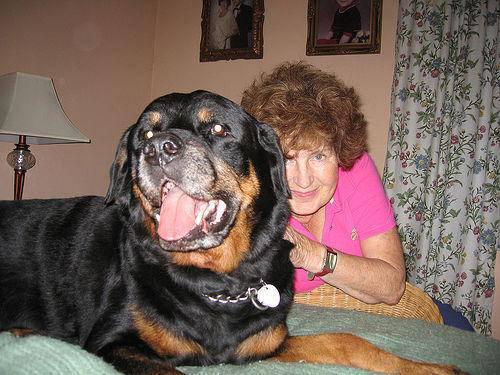

In [69]:
from PIL import Image
#nb: jupyter notebook only displays the last output.
Image.open('verify/rottweiler/cd714df1f1977466537bbf2fcbbcf0d9.jpg')